### 画像の性質ってなんだろう
画像は大量の画素(pixel)によって構成されている
→画素値を多数のデータを捉えることで、分析ができている。

#### 画像の統計量
* ヒストグラム(histogram)  
　画素値の分布を表す  
　横軸に画素値・縦軸に画素値の頻度  
 - 濃淡ヒストグラム
 - R・G・B各チャンネルのヒストグラム  


In [2]:
#濃淡ヒストグラム
import cv2
import numpy as np
from matplotlib import pyplot as plt

#カラー画像を解析する場合とグレー画像を解析する場合で分けるコードを組み込みたい。後で
def gray_histogram(imgpath):
    # 入力画像を読み込み
    img = cv2.imread(imgpath)    
    # グレースケール変換
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 方法1(NumPyでヒストグラムの算出)
    #hist, bins = np.histogram(gray.ravel(),256,[0,256])
    # 方法2(OpenCVでヒストグラムの算出)
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    
    #return hist, bins
    return hist

def show_hist(hist):
    plt.xlim(0, 255)
    plt.plot(hist)
    plt.xlabel("Pixel value", fontsize=20)
    plt.ylabel("Number of pixels", fontsize=20)
    plt.grid()
    plt.show()
    

<class 'numpy.ndarray'>


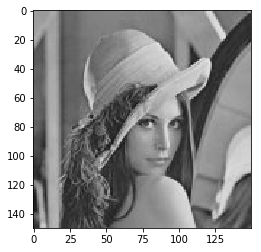

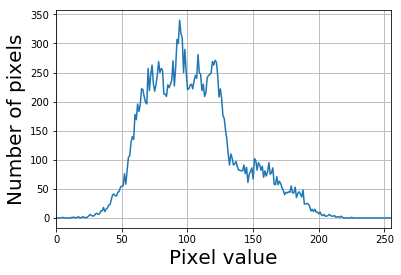

In [32]:
hist = gray_histogram('./images/Lenna.jpg')
print(type(hist))
img = cv2.imread('./images/Lenna.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap='gray',vmin = 0, vmax = 255)
plt.show()

In [54]:
#RGBヒストグラム
def rgb_histogram(imgpath):
    # 入力画像を読み込み
    img = cv2.imread(imgpath)    
    b, g, r = img[:,:,0], img[:,:,1], img[:,:,2]

    # 方法1(NumPyでヒストグラムの算出)
    #hist_r, bins = np.histogram(r.ravel(),256,[0,256])
    #hist_g, bins = np.histogram(g.ravel(),256,[0,256])
    #hist_b, bins = np.histogram(b.ravel(),256,[0,256])

    # 方法2(OpenCVでヒストグラムの算出)
    hist_r = cv2.calcHist([r],[0],None,[256],[0,256])
    hist_g = cv2.calcHist([g],[0],None,[256],[0,256])
    hist_b = cv2.calcHist([b],[0],None,[256],[0,256])
    
    return hist_r, hist_g, hist_b

def rgbhist_show(hist_r, hist_g, hist_b):
    # グラフの作成
    plt.xlim(0, 255)
    plt.plot(hist_r, "-r", label="Red")
    plt.plot(hist_g, "-g", label="Green")
    plt.plot(hist_b, "-b", label="Blue")
    plt.xlabel("Pixel value", fontsize=20)
    plt.ylabel("Number of pixels", fontsize=20)
    plt.legend()
    plt.grid()
    plt.show()


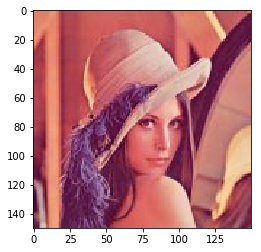

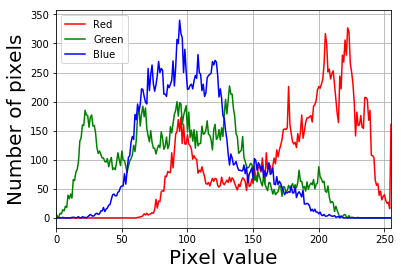

In [55]:
img = cv2.imread('./images/Lenna.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
hist_r, hist_g, hist_b = rgb_histogram('./images/Lenna.jpg')
rgbhist_show(hist_r, hist_g, hist_b)



#### 画像の統計量  2
 - 最小値(minimum value)
 - 最大値(maximum value)
 - 平均値(average value)
 - 中央値(median)
 - 最頻値(mode)
 - 分散,標準偏差(variance)(standard deviation)  


#### 画像のノイズ  
* 不規則ノイズ(random noise)  
特にノイズ振幅がガウス分布に従う時はガウスノイズ(Gaussian random noise)  
* 周期性ノイズ(cyclic noise)  
画像入力装置や画像処理装置の特性で入ってしまうことがある  
* ノイズ量の尺度  
信号対雑音比(SN比, signal to noise ratio, snr)  
SNRはノイズの大きさ(N)に対する信号の大きさ(S)で表すが、単位をデジベル(dB)単位で表すことが多い  

$$
SNR = 10log_{10}(\frac{S}{N})
$$
$$
\sigma_{s}^2：ノイズを含まない画像の画素値の分散
\sigma_{n}^2：ノイズの分散
SNR = 10log_{10}(\frac{\sigma_{s}^2}{\sigma_{n}^2})  =  20log_{10}(\frac{\sigma_{s}}{\sigma_{n}})
$$

画像に含まれるノイズは画素値のゆらぎとして現れ、ガウスノイズでモデル化されることが多い。  
が、実際にはカメラの機種や設定で異なる、画素値に依存する大きさのノイズが含まれることもある。  
→カメラのノイズは測定できるのか？  
 * 条件　
    * 安定した照明環境  
    * カメラを固定  
    * 静止したシーン  
 * 方法　
    * 上記の条件でたくさん撮影  
    * 画像の枚数方向に平均と分散を使って、画像の格位置における平均と標準偏差を求めることができる。

#### コントラスト
コントラストとは、画像のヒストグラムの分布の広がりのことである。

数式３つ


いずれの場合でも、画像中に１画素でも画素値が極端な数値が現れると、画像全体から受ける印象は同じだが、コントラストが異なってしまうという現象が起こる。  
最大値・最小値を求めるときに頻度を考慮するなどの工夫が必要。

#### シャープネス
画像を見たときに感じる鮮鋭度(sharpness)と呼ぶ。  
鮮鋭度(sharpness)が高い画像は、エッジ付近の画素地変化が急激で、画像中の細かな部分まで鮮明に観察できる。  
鮮鋭度(sharpness)が低い画像は、エッジ付近の画素地変化が緩やかで、画像中の細かな部分を読み取りにくい。

はかり方もいろいろあるらしいが、たぶん使わないので割愛。
メモ　低くするのが平滑化？

※表色系と色空間はあまり使わなそうなので割愛(keywordは以下)
* マンセル表色系
* CIE-RGB表色系
* CIE-Lab色空間
* sRGB色空間
* HSI変換　など
